# Preparing Manifesto Project data using *quanteda*

In [1]:
options(width=120)

The file CSV-files in folder "Manifesto Project"
need to be downloaded from the [Manifesto Project website](https://manifesto-project.wzb.eu/datasets).
Redistribution of the data is prohibited, so readers who want to reproduce the following will need to download their own copies of the data data files it to the virtual machine that runs this notebook. To do this,

1. open the file manager window of this site using [this link](/user-redirect/tree/09-text-as-data/)
2. create a subfolder named "ManifestoProject" in the current folder "09-text-as-data"
3. activate the subfolder "ManifestoProject" by clicking on it
4. use the button labelled "Upload" to upload the files that you downloaded from the Manifesto Project website
5. after uploading the files, they should appear in the list of files in the folder "ManifestoProject".

Note that the uploaded data will disappear, once you "Quit" the notebook (and the Jupyter instance).

In [2]:
csv.files <- dir("ManifestoProject",
                 full.names=TRUE,
                 pattern="*.csv")
length(csv.files)

[1] 14

The package *readtext* (a companion package for *quanteda*) is somewhat better able to
deal with the Manfisto Project CSV files than *tm*. It is available from [CRAN](https://cran.r-project.org/package=readtext). You may need to install it the code
`install.packages("quanteda")` if you want to run this on your computer. (The
package is already installed on the notebook container, however.)

In [3]:
library(readtext)

In [4]:
UKLib.rt <- readtext("ManifestoProject/*.csv",
               text_field=1,
               docvarsfrom="filenames",
               docvarnames=c("party","date"))
nrow(UKLib.rt)

[1] 4228

Here we create an index of documents in the corpus:

In [5]:
UKLib.rta <- aggregate(text~party+date,
                       FUN=function(x)paste(x,collapse=" "),
                       data=UKLib.rt)
nrow(UKLib.rta)

[1] 14

In [6]:
UKLib.rta <- within(UKLib.rta,
              doc_id <- paste(party,date,sep="_"))

The following makes use of the *quanteda* package. You may need to install it from
[CRAN](https://cran.r-project.org/package=quanteda) using the code
`install.packages("quanteda")` if you want to run this on your computer. (The
package is already installed on the notebook container, however.)

In [7]:
library(quanteda)

Package version: 3.3.1
Unicode version: 14.0
ICU version: 70.1
Parallel computing: 8 of 8 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: ‘quanteda’

The following object is masked from ‘package:readtext’:

    texts



In [8]:
UKLib.corpus <- corpus(UKLib.rta)
UKLib.corpus

Corpus consisting of 14 documents and 2 docvars.
51420_196410 :
"""THINK FOR YOURSELF""  The Liberal Party offers the elector..."

51420_196603 :
"For All the People: the Liberal Plan of 1966  BRITAIN DEMAND..."

51420_197006 :
"What a Life!  There must surely be a better way to run a cou..."

51420_197402 :
"'Change the face of Britain'  THE CRISIS OF GOVERNMENT  This..."

51420_197410 :
"Why Britain Needs Liberal Government  A PERSONAL MESSAGE FRO..."

51420_197905 :
"'The Real Fight is for Britain'  INTRODUCTION  With your sup..."

[ reached max_ndoc ... 8 more documents ]

Here we combine metadata with the text documents:

In [9]:
manifesto.metadata <- read.csv("documents_MPDataset_MPDS2019b.csv",stringsAsFactors=FALSE)
str(manifesto.metadata)

'data.frame':	4492 obs. of  6 variables:
 $ country    : int  11 11 11 11 11 11 11 11 11 11 ...
 $ countryname: chr  "Sweden" "Sweden" "Sweden" "Sweden" ...
 $ party      : int  11110 11110 11110 11110 11110 11110 11110 11110 11110 11220 ...
 $ partyname  : chr  "Green Ecology Party" "Green Ecology Party" "Green Ecology Party" "Green Ecology Party" ...
 $ date       : int  198809 199109 199409 199809 200209 200609 201009 201409 201809 194409 ...
 $ title      : chr  "Valmanifest" "Valmanifest ‘91" "Valmanifest" "Valmanifest 98" ...


In [10]:
docvars(UKLib.corpus) <- merge(docvars(UKLib.corpus),
                               manifesto.metadata,
                               by=c("party","date"))
str(docvars(UKLib.corpus))

'data.frame':	14 obs. of  6 variables:
 $ party      : int  51420 51420 51420 51420 51420 51420 51420 51420 51421 51421 ...
 $ date       : int  196410 196603 197006 197402 197410 197905 198306 198706 199204 199705 ...
 $ country    : int  51 51 51 51 51 51 51 51 51 51 ...
 $ countryname: chr  "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...
 $ partyname  : chr  "Liberal Party" "Liberal Party" "Liberal Party" "Liberal Party" ...
 $ title      : chr  "Think for Yourself - Vote Liberal" "For all the People: The Liberal Plan of 1966" "What a Life!" "Change the Face of Britain" ...


Finally we create a document-feature matrix, without punctuation, numbers,
symbols and stopwords:

In [11]:
UKLib.dfm <- dfm(UKLib.corpus,
                 remove_punct=TRUE,
                 remove_numbers=TRUE,
                 remove_symbols=TRUE,
                 remove=stopwords("english"),
                 stem=TRUE)
str(docvars(UKLib.dfm))

'dfm.corpus()' is deprecated. Use 'tokens()' first.
'...' should not be used for tokens() arguments; use 'tokens()' first.
'remove' is deprecated; use dfm_remove() instead
'stem' is deprecated; use dfm_wordstem() instead


'data.frame':	14 obs. of  6 variables:
 $ party      : int  51420 51420 51420 51420 51420 51420 51420 51420 51421 51421 ...
 $ date       : int  196410 196603 197006 197402 197410 197905 198306 198706 199204 199705 ...
 $ country    : int  51 51 51 51 51 51 51 51 51 51 ...
 $ countryname: chr  "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...
 $ partyname  : chr  "Liberal Party" "Liberal Party" "Liberal Party" "Liberal Party" ...
 $ title      : chr  "Think for Yourself - Vote Liberal" "For all the People: The Liberal Plan of 1966" "What a Life!" "Change the Face of Britain" ...


A more fine-grained control is possible using `tokens()`:

In [12]:
UKLib.toks <- tokens(UKLib.corpus,
                     remove_punct=TRUE,
                     remove_numbers=TRUE)
UKLib.toks

Tokens consisting of 14 documents and 6 docvars.
51420_196410 :
 [1] "THINK"         "FOR"           "YOURSELF"      "The"           "Liberal"       "Party"         "offers"       
 [8] "the"           "electorate"    "a"             "radical"       "non-Socialist"
[ ... and 8,854 more ]

51420_196603 :
 [1] "For"     "All"     "the"     "People"  "the"     "Liberal" "Plan"    "of"      "BRITAIN" "DEMANDS" "A"      
[12] "NEW"    
[ ... and 31,786 more ]

51420_197006 :
 [1] "What"   "a"      "Life"   "There"  "must"   "surely" "be"     "a"      "better" "way"    "to"     "run"   
[ ... and 23,961 more ]

51420_197402 :
 [1] "Change"     "the"        "face"       "of"         "Britain"    "THE"        "CRISIS"     "OF"        
 [9] "GOVERNMENT" "This"       "country"    "has"       
[ ... and 13,765 more ]

51420_197410 :
 [1] "Why"        "Britain"    "Needs"      "Liberal"    "Government" "A"          "PERSONAL"   "MESSAGE"   
 [9] "FROM"       "THE"        "RT"         "HON"       


In [13]:
UKLib.dfm <- dfm(UKLib.toks)
UKLib.dfm

In [14]:
UKLib.dfm <- dfm_remove(UKLib.dfm,
                        pattern=stopwords("english"))
UKLib.dfm

In [15]:
UKLib.dfm <- dfm_wordstem(UKLib.dfm,language="english")
UKLib.dfm

*quanteda* provides support for dictionaries:

In [16]:
milecondict <- dictionary(list(
                Military=c("military","forces","war","defence","victory","victorious","glory"),
                Economy=c("economy","growth","business","enterprise","market")
))

Here we extract the frequency of tokens belonging to certain dictionaries:

In [17]:
UKLib.milecon.dfm <- dfm(UKLib.corpus,
                         dictionary=milecondict)
UKLib.milecon.dfm

'dfm.corpus()' is deprecated. Use 'tokens()' first.
'dictionary' and 'thesaurus' are deprecated; use dfm_lookup() instead


In [18]:
time <- with(docvars(UKLib.milecon.dfm),
             ISOdate(year=date%/%100,
                     month=date%%100,
                     day=1))
time

 [1] "1964-10-01 12:00:00 GMT" "1966-03-01 12:00:00 GMT" "1970-06-01 12:00:00 GMT" "1974-02-01 12:00:00 GMT"
 [5] "1974-10-01 12:00:00 GMT" "1979-05-01 12:00:00 GMT" "1983-06-01 12:00:00 GMT" "1987-06-01 12:00:00 GMT"
 [9] "1992-04-01 12:00:00 GMT" "1997-05-01 12:00:00 GMT" "2001-06-01 12:00:00 GMT" "2005-05-01 12:00:00 GMT"
[13] "2015-05-01 12:00:00 GMT" "2017-06-01 12:00:00 GMT"

In [19]:
UKLib.ntok <- ntoken(UKLib.corpus)

In [20]:
milit.freq <- as.vector(UKLib.milecon.dfm[,"Military"])
econ.freq <- as.vector(UKLib.milecon.dfm[,"Economy"])
milit.prop <- milit.freq/UKLib.ntok
econ.prop <- econ.freq/UKLib.ntok

We plot the frequency of tokens over time:

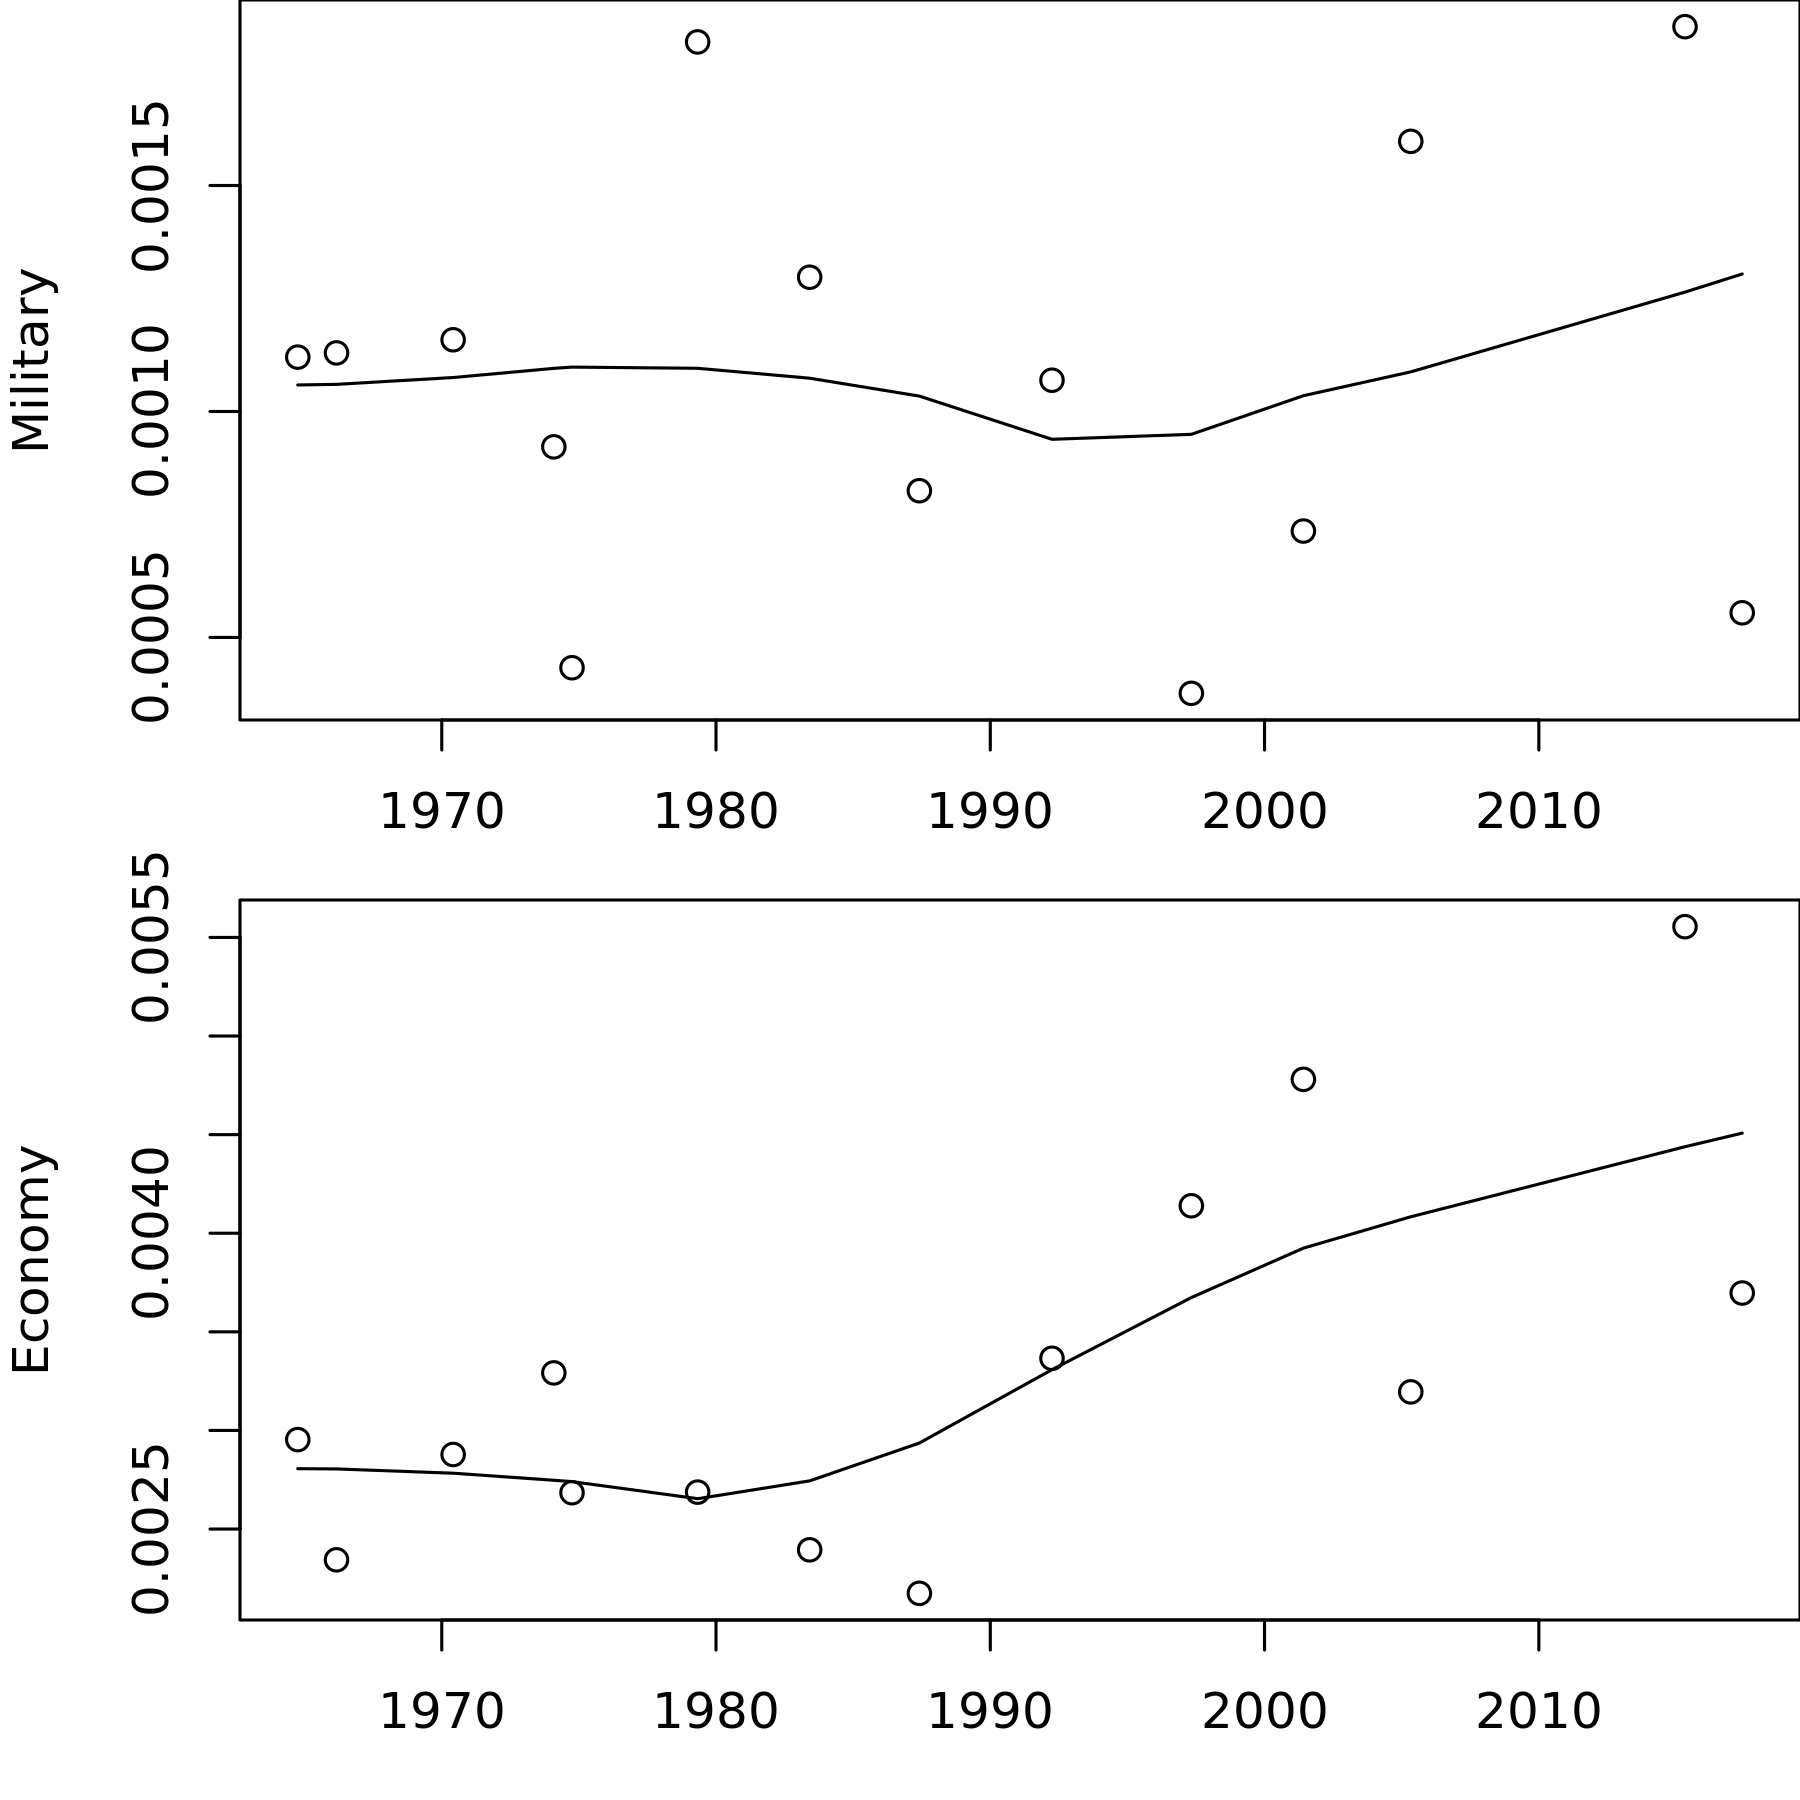

In [21]:
op <- par(mfrow=c(2,1),mar=c(3,4,0,0))
plot(time,milit.prop,type="p",ylab="Military")
lines(time,lowess(time,milit.prop)$y)
plot(time,econ.prop,type="p",ylab="Economy")
lines(time,lowess(time,econ.prop)$y)
par(op)